# Data Analysis Techniques - Software Exercise

In [2]:
# setup

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import emcee
import corner

### 1. Simple Monte-Carlo estimation example

<strong> The PDF for the decay angle </strong>$\theta$<strong> in muon decay is given by:</strong>$$\mathbf{p(x) = \frac{1}{2}(1+\alpha x)}$$<strong>

where </strong>$\mathbf{-1 \le x = \cos(\theta) \le 1}$, and $\mathbf{\alpha \approx \frac{1}{3}}$
<br>
<br>
<br>
<br>
<strong>(a) Use the transformation method to find an expression that will enable you to generate variables </strong>$\mathbf{x}$<strong> drawn from the PDF given by equation </strong>$\mathbf{1}$<strong> from uniform random variates </strong>$\mathbf{u}$<strong> drawn from </strong>$\mathbf{U (0, 1)}$.</strong>



Firstly, given our probability density function (PDF) $p(x)$ is already normalised, we can integrate the PDF between our lower bound $-1$ and $x$ and equate it to $\mathbf{u}$:$$\mathbf{u}=\int_{-1}^{x} \frac{1}{2}(1+\alpha x^{'})~dx^{'}$$ 

Taking the $\frac{1}{2}$ constant out to the front of the integral:$$\mathbf{u}=\frac{1}{2}\int_{-1}^{x}(1+\alpha x)~dx^{'}$$

Splitting the integral into parts:$$\mathbf{u}= \frac{1}{2}\left(\int_{-1}^{x}1~dx^{'} + \int_{-1}^{x} \alpha x^{'}~dx^{'}\right)$$ 

Deriving the first part:$$\int_{-1}^{x} 1~dx^{'}=x-(-1)=x+1$$

And the second part:$$\int_{-1}^{x} \alpha x^{'}~dx^{'}=\alpha\left[\frac{x^{'2}}{2}\right]_{-1}^{x}= \alpha\left(\frac{ (x)^{2}}{2}-\frac{ (-1)^{2}}{2}\right)= \alpha\left(\frac{ x^{2}}{2} - \frac{1}{2}\right)=\frac{\alpha}{2}(x^{2}-1)$$

Then recombining these parts, simplifying then rearranging:$$\mathbf{u}=\frac{1}{2}\left[(x+1)+\left(\frac{\alpha}{2}(x^{2}-1)\right)\right]=\frac{1}{2}x+\frac{1}{2}+\frac{1}{2}\left(\frac{\alpha x^{2}}{2}-\frac{\alpha}{2}\right)$$ $$ = \frac{1}{2}x+\frac{1}{2}+\frac{\alpha x^{2}}{4}-\frac{\alpha}{4} = \frac{1}{4}\alpha x^{2}+\frac{1}{2}x+\frac{1}{2}-\frac{1}{4}\alpha$$

We can note that $\mathbf{u}$ is a quadratic in terms of $x$ and so to find $x$ we can rewrite the expression in the form $ax^{2} + bx + c = 0$:$$ \mathbf{u} = \frac{1}{4}\alpha x^{2}+\frac{1}{2}x+\frac{1}{2}-\frac{1}{4}\alpha $$ $$ 4\mathbf{u} = \alpha x^{2}+2x+2-\alpha $$ $$ \alpha x^{2}+2x+(2-\alpha - 4\mathbf{u}) = 0 $$

Then, applying the quadratic formula:$$ x = \frac{-b \pm \sqrt{b^{2}-4ac}}{2a} $$

We can derive an expression for $x$. Since $a = \alpha,~b = 2,~c = 2-\alpha-4\mathbf{u}$:$$ x = \frac{-(2) \pm \sqrt{(2)^{2}-4(\alpha)(2-\alpha-4\mathbf{u})}}{2(\alpha)} = \frac{-2 \pm \sqrt{4-8\alpha+4\alpha^{2}+16\alpha\mathbf{u}}}{2\alpha} = \frac{-2 \pm \sqrt{4(1-2\alpha+\alpha^{2}+4\alpha\mathbf{u})}}{2\alpha} $$ $$ \frac{-2 \pm \sqrt{4}\sqrt{(1-2\alpha+\alpha^{2}+4\alpha\mathbf{u})}}{2\alpha} = \frac{-2 \pm 2\sqrt{(1-2\alpha+\alpha^{2}+4\alpha\mathbf{u})}}{2\alpha} = \frac{-1 \pm \sqrt{(1-2\alpha+\alpha^{2}+4\alpha\mathbf{u})}}{\alpha} $$

We should note that since a cumulative distribution function is monotonically increasing, and $\mathbf{u} = f_{cdf}(x)$, the $x$ values we generate need to also be monotonically increasing as $u$ increases. This is also paired with the constraint that our $x$ values need to lie between $-1$ and $1$ As such, the following code determines which root (positive or negative) should be used:

In [3]:


np.random.seed(123)  # ensures reproducibility

alpha = 0.33 # from question 1's description
test_u_values = np.sort(np.random.uniform(0, 1, 10)) # 10 random numbers between 0 and 1, sorted in ascending order

# ensure roots monotonically increase with u

def root_test(u_values):
    
    positive_roots = [] # initialise empty positive roots list
    negative_roots = [] # initialise empty negative roots list
    
    for u in u_values:
        discriminant = np.sqrt((alpha ** 2) - (2 * alpha) + (4 * alpha * u) + 1)  # calculate discriminant
        positive_roots.append((1/alpha) * (-1 + discriminant))                    # add positive root to list
        negative_roots.append((1/alpha) * (-1 - discriminant))                    # add negative root to list
        
    return positive_roots, negative_roots # return each list for inspection

root_test(test_u_values)


([np.float64(-0.40888261695558825),
  np.float64(-0.2752193709536842),
  np.float64(-0.05119745826765527),
  np.float64(0.011192251278290367),
  np.float64(0.124313901846973),
  np.float64(0.2567524387252112),
  np.float64(0.49433835899589285),
  np.float64(0.514295836900028),
  np.float64(0.5534054389029168),
  np.float64(0.9709694278492711)],
 [np.float64(-5.651723443650472),
  np.float64(-5.785386689652376),
  np.float64(-6.0094086023384055),
  np.float64(-6.071798311884351),
  np.float64(-6.1849199624530335),
  np.float64(-6.317358499331272),
  np.float64(-6.554944419601954),
  np.float64(-6.574901897506089),
  np.float64(-6.614011499508977),
  np.float64(-7.031575488455331)])

In [4]:

# find maximum and minimum x values from positive and negative roots

alpha = 0.33

print(f"""
Minimum Positive Root: {(1/alpha) * (-1 + np.sqrt((alpha ** 2) - (2 * alpha) + (4 * alpha * 0) + 1))}
Maximum Positive Root: {(1/alpha) * (-1 + np.sqrt((alpha ** 2) - (2 * alpha) + (4 * alpha * 1) + 1))}

Minimum Negative Root: {(1/alpha) * (-1 - np.sqrt((alpha ** 2) - (2 * alpha) + (4 * alpha * 0) + 1))}
Maximum Negative Root: {(1/alpha) * (-1 - np.sqrt((alpha ** 2) - (2 * alpha) + (4 * alpha * 1) + 1))}

""")


Minimum Positive Root: -1.0000000000000002
Maximum Positive Root: 1.0000000000000002

Minimum Negative Root: -5.0606060606060606
Maximum Negative Root: -7.0606060606060606




We can see, as expected, that positive roots monotonically increase, ranging between $-1$ and $1$. Negative roots also monotonically increase, as expected, but they range between around $-5$ and $-7$, which is beyond our desired range. As such, we should opt to only use positive roots since they satisfy our $[-1,1]$ constraint.

As such, our expression for $x$:$$ \boxed{x=\frac{1}{\alpha}\left(-1 + \sqrt{\alpha^{2}-2\alpha+4\alpha \mathbf{u}+1}\right)} $$

<strong> (b) Generate </strong> $\mathbf{1000}$ <strong> random numbers </strong> $\mathbf{x}$ <strong> following this PDF for </strong> $\mathbf{\alpha = −0.33}$ <strong> and plot their histogram. </strong>

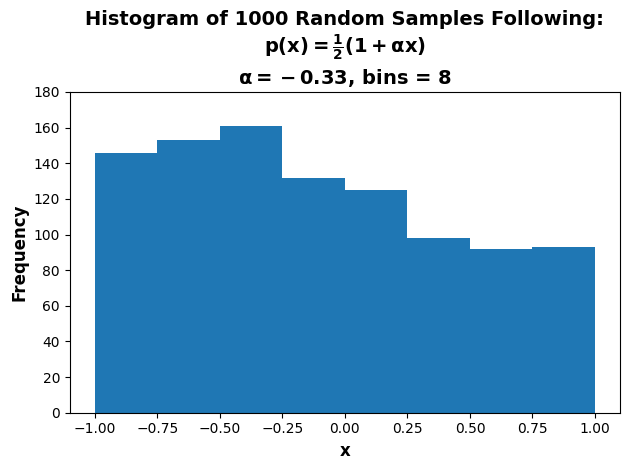

In [5]:
np.random.seed(123)  # ensures reproducibility

alpha = -0.33 # the value of alpha for part (b)
x_values = [] # initialise an empty list to store generated x-values in

def x_generator(n):
        
        # until we have n number of x values, uniformly distributed between [-1,1]...
        while len(x_values) < n:
                u = np.random.uniform(0, 1)                                              # generate a random number between 0 and 1
                discriminant = np.sqrt((alpha ** 2) - (2 * alpha) + (4 * alpha * u) + 1) # calculate discriminant using u
                x = (1/alpha) * (-1 + discriminant)                                      # find the positive root for x
                x_values.extend([x])                                                     # add x to list of x_values
                
        return x_values # return array of n x-values

x_values = x_generator(1000) # generate 1000 x-values

# plot x_values in histogram
plt.hist(
    x_values,       # our generated x-values
    bins = 8,       # chosen since there are 8 intervals of 0.25 on x-axis
    range = (-1, 1) # between -1 and 1
)

plt.title(("Histogram of 1000 Random Samples Following:\n" + r"$\mathbf{p(x) = \frac{1}{2}(1+\alpha x)}$" + "\n" + r"$\mathbf{\alpha = -0.33}$, bins = 8"), loc = "center", fontsize = 14, fontweight = "bold")

plt.ylabel("Frequency", fontsize = 12, fontweight = "bold")
plt.yticks(np.arange(0, 200, 20))

plt.xlabel("x", fontsize = 12, fontweight = "bold")


plt.tight_layout()
plt.show()

<strong> (c) From your simulated dataset, estimate the value of </strong> $\mathbf{\alpha}$ <strong> by (i) maximum likelihood, and (ii) the method of moments. </strong>

##### (i) Maximum Likelihood

Firstly, given our probability density function:$$p(x)=\frac{1}{2}(1 + \alpha x)$$

We can express the likelihood function for $\alpha$:$$\mathcal{L}(\alpha)=\prod_{i=1}^{N} \frac{1}{2}(1 + \alpha x_{i})$$ 

And thus the log-likelihood function:$$l(\alpha)=\sum_{i=1}^{N} \ln\left(\frac{1}{2}(1 + \alpha x_{i})\right)$$

Differentiating $l$ with respect to $\alpha$ and setting this to zero: $$\frac{\partial l}{\partial \alpha}=\frac{\partial }{\partial \alpha} \cdot \sum_{i=1}^{N} \ln\left(\frac{1}{2}(1 + \alpha x_{i})\right)=0$$ 

Since $\ln(ab)=\ln(a) + \ln(b)$: $$\frac{\partial }{\partial \alpha} \cdot \sum_{i=1}^{N} \ln\left(\frac{1}{2}(1 + \alpha x_{i})\right)=\frac{\partial}{\partial \alpha} \cdot \sum_{i=1}^{N} \ln\left(\frac{1}{2}\right)+\ln\left(1 + \alpha x_{i}\right)$$

And since $\displaystyle\frac{\partial}{\partial \alpha} \cdot \ln\left(\frac{1}{2}\right)=0$:$$\frac{\partial l}{\partial \alpha} = \frac{\partial }{\partial \alpha} \cdot \sum_{i=1}^{N} \ln\left(1 + \alpha x_{i}\right)$$

Applying the chain rule:$$\frac{\partial l}{\partial \alpha} = \sum_{i=1}^{N} \frac{1}{1 + \alpha x_{i}} \cdot \frac{\partial }{\partial \alpha} (1 + \alpha x_{i})$$ $$ \frac{\partial l}{\partial \alpha} =  \sum_{i=1}^{N} \frac{1}{1 + \alpha x_{i}} \cdot x_{i}$$ $$ \boxed{\frac{\partial l}{\partial \alpha} = \sum_{i=1}^{N} \frac{x_{i}}{1 + \alpha x_{i}}=0}$$

Whilst an analytic solution cannot be found for $\alpha$, we can note that since $p(x) \in [0,1]$, $~0 \le 1+\alpha x \le 1$. Furthermore, since $x \in [-1,1]$, our potential value for $\alpha$ must ensure $0 \le 1+\alpha x \le 1$ for all values of $x \in [-1,1]$.

When $x = -1$: $$~1+\alpha(-1) \ge 0$$ $$ \therefore~ \alpha \le 1 $$

When $x = 1$: $$~1+\alpha(1) \ge 0$$ $$ \therefore~ \alpha \ge -1 $$

As such, we have an upper and lower bound for $\alpha$.

With no analytic solution, we can apply the Newton-Raphson solution to find the maximum likelihood estimate for $\alpha$, where $\alpha \in [-1,1]$:$$\alpha{'} = \alpha - \frac{\displaystyle\frac{\partial l}{\partial \alpha}}{\displaystyle\frac{\partial^{2}l}{\partial \alpha^{2}}}$$

Expressing $\displaystyle\frac{\partial^{2}l}{\partial \alpha^{2}}$:$$\displaystyle\frac{\partial^{2}l}{\partial \alpha^{2}}=\frac{\partial}{\partial \alpha}\sum_{i=1}^{N} \frac{x_{i}}{1 + \alpha x_{i}}$$ 

Applying the quotient rule:$$ \frac{\partial}{\partial \alpha}\sum_{i=1}^{N} \frac{x_{i}}{1 + \alpha x_{i}} = \sum_{i=1}^{N} \frac{\frac{\partial}{\partial \alpha}(x_{i}) \cdot (1-\alpha x_{i}) - x_{i} \cdot \frac{\partial}{\partial \alpha}(1 + \alpha x_{i})}{(1+\alpha x_{i})^{2}} = \sum_{i=1}^{N} \frac{0 - x_{i}^{2}}{(1+\alpha x_{i})^{2}} $$ $$ \boxed{\displaystyle\frac{\partial^{2}l}{\partial \alpha^{2}} = \sum_{i=1}^{N} \frac{- x_{i}^{2}}{(1+\alpha x_{i})^{2}}} $$

Thus:$$ \alpha_{k+1} = \alpha_{k} - \frac{\displaystyle\frac{\partial l}{\partial \alpha_{k}}}{\displaystyle\frac{\partial^{2}l}{\partial \alpha_{k}^{2}}} $$

To express the uncertainty on this estimate, we can use the negative inverse of the second-order derivative of the log-likelihood function (with respect to $\alpha$) - i.e. the Cramér–Rao bound - to find the variance on our maximum likelihood estimate. Thus the square root of this variance will give the standard deviation based on our sample of $x$ values. Since we already have an expression for the second-order derivative:$$\boxed{\sigma^{2}_{\alpha^{*}}= \frac{1}{-\left(\sum_{i=1}^{N} \frac{- x_{i}^{2}}{(1+\alpha x_{i})^{2}}\right)}}$$

Iterating until convergence will provide us with the maximum likelihood estimate for $\alpha$ and its uncertainty. This is performed by the following script, starting with an initial estimate for $\alpha = 0$:

In [6]:
x_array = np.array(x_values) # from part b

# first-order derivative of l with respect to alpha
def func(a):
    return np.sum(x_array / (1 + a*x_array))

# second-order derivative of l with respect to alpha
def fprime(a):
    return np.sum(-x_array**2 / (1 + a * x_array)**2)

# apply Newton-Raphson solution
mle = sp.optimize.newton(
    func = func,    # the first-order derivative of x_i
    x0 = 0,         # initial estimate for alpha
    fprime = fprime # the second-order derivative of x_i
)

# uncertainty on MLE for alpha
def min_stdev_mle(mle):
    cramer_rao_bound = 1 / (-fprime(mle)) # use MLE value for alpha in second-order derivative
    return np.sqrt(cramer_rao_bound)      # take square-root of cramer-rao bound

# apply uncertainty function to calculated MLE for alpha
mle_stdev = min_stdev_mle(mle)

# print results
print(f"N = {len(x_array)} \nMLE for alpha: {mle:.4f} \nMinimum standard deviation on MLE: {mle_stdev:.4f}")

N = 1000 
MLE for alpha: -0.3398 
Minimum standard deviation on MLE: 0.0528


##### (ii) Method of moments

Firstly, we can again note our probability density function:$$p(x)=\frac{1}{2}(1+\alpha x)$$

Finding the first moment (the expectation value) of $x$, we multiply this PDF by $x$ and then integrate, with respect to $x$, between our range of $x$-values (-1, 1):$$E[x] =  \frac{1}{2} \int_{-1}^{1} x(1 + \alpha x)~dx $$ 

Simplifying: $$ E[x] = \frac{1}{2} \int_{-1}^{1} (x + \alpha x^{2})~dx $$ $$E[x] = \frac{1}{2} \left(\int_{-1}^{1} x~dx + \alpha \int_{-1}^{1} x^{2}~dx\right) $$

The first integral inside the brackets is:$$ \int_{-1}^{1} x~dx = \left[\frac{x^{2}}{2}\right]_{-1}^{1} = \frac{(1)^{2}}{2} - \frac{(-1)^{2}}{2} = 0$$

And the second integral:$$\int_{-1}^{1}x^{2}~dx = \left[\frac{x^{3}}{3}\right] = \frac{(1)^{3}}{3} - \frac{(-1)^{3}}{3} = \frac{2}{3}$$

Recombining:$$E[x] = \frac{1}{2} \left(0 + \alpha \frac{2}{3}\right) = \frac{1}{2} \left(\frac{2}{3}\alpha\right) = \boxed{\frac{\alpha}{3} }$$

Thus:$$\alpha = 3 \cdot E[x]$$

Given that $\bar{x} \to E[x]$ as sample size $N \to \infty$:$$\alpha = 3\bar{x} = 3 \cdot \frac{1}{N}\sum_{i=1}^{N}x_{i}$$

Then, to find the uncertainty on this estimate for $\alpha$, we can find the second moment:
$$\sigma_{\alpha}^{2} = E[\alpha^{2}] - E[\alpha]^{2}$$ 
$$ \sigma_{\alpha}^{2} = E\left[\frac{3}{N}\sum_{i=1}^{N}x_{i} \cdot \frac{3}{N}\sum_{j=1}^{N}x_{j}\right] -9\bar{x}^{2}$$ 
$$ \sigma_{\alpha}^{2} = \frac{9}{N^{2}}E\left[\sum_{i=1}^{N}x_{i} + \sum_{i=1,i\neq j}^{N} x_{i}x_{j}\right] - 9E[x]^{2}$$ 
$$ \sigma_{\alpha}^{2} = \frac{9}{N^{2}}(NE[x^{2}]+N(N-1)E[x]E[x]-N^{2}E[x]^{2}) $$
$$ \sigma_{\alpha}^{2} = \frac{9}{N^{2}}\cdot N \cdot (E[x^{2}]-E[x]^{2}) $$
$$ \sigma_{\alpha}^{2} = \frac{9}{N}\sigma_{x}^{2} $$
$$ \boxed{\therefore~\sigma_{\alpha}= \sqrt{\frac{9}{N}\sigma_{x}^{2}}} $$

Thus, using the following script, we can calculate the value of $\bar{x}$ from our $1{,}000$ samples and estimate $\alpha$, with some uncertainty $\sigma_{\alpha}$. 

In [7]:
x_array # the array of generated x-values, from the MLE script

moment_1 = 3 * np.mean(x_array)                                 # the 1st moment
moment_1_stdev = np.sqrt( ( 9/len(x_array)) * np.var(x_array) ) # the uncertainty on the 1st moment (square-root of 2nd moment), should be slightly larger than MLE uncertainty

# print results
print(f"N = {len(x_array)} \nMethod of Moments estimate for alpha: {moment_1:.4f} \nStandard deviation: {moment_1_stdev:.4f}")

N = 1000 
Method of Moments estimate for alpha: -0.3367 
Standard deviation: 0.0532


### 2. Model Selection

<strong> The file polydat.txt, available from https://canvas.sussex.ac.uk/courses/31230/pages/assignments-and-guidance-2, contains the coordinates of </strong> $\mathbf{21}$ <strong> pairs of data </strong> $(x, y)$<strong>, most easily read using: x, y = numpy.loadtxt(’polydat.txt’)

The data were generated using a polynomial function of order </strong> $N < 10$ <strong> evaluated at regularly spaced values in </strong> $x$. <strong> In order to simulate measurement errors, a random error drawn from a Gaussian with </strong>  $\mu = 0$<strong>, </strong>$\sigma = 0.1$<strong>, has been added to each </strong> $y$<strong> value.

Write a script to fit a polynomial of specified order to these data. Fit a series of polynomials of order </strong> $0$ to $9$<strong>, tabulating the </strong> $\chi^{2}$<strong>, </strong>$\chi^{2}$<strong> confidence level, and the Akaike and Bayesian information criteria (AIC and BIC) for each fit. Hence decide which order polynomial was most likely used to generate the data. Plot your fit on top of the data (give each point a</strong> $y$<strong>-error of </strong>$0.1$<strong>). </strong>

Using our values of $x$ and the measured values of $y$, we need to determine which order polynomial, from $0$ to $9$, best fits the generated data. To start, we can note that the our best-fit polynomial will take the form:

$$\displaystyle\sum_{i=0}^{N} a_{i}x^{i},~~~\text{where } 0 \le N \le 9 \text{ and }  N \in \mathbb{Z}$$

Our aim, therefore, is to estimate the order $N$ of the polynomial, and its associated $a_{i}$ values. The following outlines the analysis plan:

 - Firstly, for each polynomial model, we can use <strong> numpy.polyfit(x, y, o) </strong> to obtain the coefficients that minimise $\chi^{2}$
   - Where $x$ is the set of $x$-values, $y$ the set of observed $y$-values and $o$ the order of the polynomial

 - We can then use <strong> numpy.polyval(coefficients, x) </strong> to generate the expected set of $y$-values for that fitted polynomial.

 - Next, we use these expected values, combined with our actual observed values, to calculate the $\chi^{2}$ for each polynomial model.
   - $\chi^{2} = \displaystyle\sum_{i=1}^{N} \frac{\displaystyle(y_{i} - y(x_{i}))^{2}}{\displaystyle\sigma_{i}^{2}}$, where $y_{i}$ is the observed $y$-value, $y(x_i)$ is the expected $y$-value and $\sigma_{i}^{2}$ is the variance on each observed $y$-value

 - From these $\chi^{2}$ values, we can determine the p-value of the $\chi^{2}$ using the cumulative distribution function of a $\chi^{2}$ distribution. 
   - If the $p$-value is between $0.05$ and $0.95$, we have some evidence of a good model fit
     - $p < 0.05$ indicates poor fit
     - $p > 0.95$ indicates overfitting

 - Given the observed $y$-values have Gaussian measurement errors, we find the log-likeihood of a Gaussian probability distribution function using our expected and observed $y$-values. 
   - We use this to find the AIC and BIC
   - $\displaystyle\mathcal{L} = \displaystyle\prod_{i=1}^{N} \displaystyle\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(\displaystyle\frac{(y_{i}-y(x_{i})^{2})}{2\sigma^{2}}\right)$
   - $\displaystyle\mathcal{l} = -\displaystyle\frac{N}{2}\ln(2\pi\sigma^{2})-\displaystyle\frac{1}{\sqrt{2\sigma^{2}}}\displaystyle\sum_{i=1}^{N}(y_{i}-y(x_{i}))^{2}$

 - To determine the AIC, we apply the following formula:
     - $\text{ AIC } = 2k - 2\mathcal{l}$
     - Where $k$ is the number of parameters in the model (i.e. $N+1$)
     - Smaller AIC is better

 - To determine the BIC, we apply the following formula:
   - $\text{ BIC } = k \ln(N) - 2 \mathcal{l}$
   - Where $N$ is the number of data points
   - Smaller BIC is better

 - To determine the best-fit model, of those polynomials whose $p$-value lies within the accepted range $[0.05, 0.95]$, the model with the smallest BIC value will be chosen as the best fit.
   - This is because the BIC most strongly penalises models with additional complexity

 - Finally, we can plot the best-fit polynomial to the data, along with the $0.1\sigma$ error on each observed $y$-value

In [8]:
x, y = np.loadtxt("polydat.txt")

sigma = 0.1 # the uncertainty on each y-value
N = len(y)  # the number of data points (21)

# initialise empty lists to store each set of statistics to use in the table
chi_squared_values = []
aic_values = []
bic_values = []
p_values = []

# for loop to check each polynomial model between 0 and 9
for i in range(0, 10):
    
    # fit data to polynomial of i-th order, obtain derived coefficients
    coefficients = np.polyfit(x = x, y = y, deg = i)
    
    # use coefficients and x to generate expected y-values
    expected_y = np.polyval(coefficients, x)
    
    # use observed and expected y-values to calculate chi-squared
    chi_squared = np.sum( ((y - expected_y) ** 2) / sigma ** 2 )
    chi_squared_values.append(chi_squared) # append chi-square value to list
    
    # use calculated chi-squared with chi-squared table to determine confidence level
    ## find the number of parameters
    k = i + 1
    ## degrees of freedom
    dof = N - k
    ## find p-value for chi-squared statistic
    p_value = 1 - sp.stats.chi2.cdf(chi_squared, dof)   
    p_values.append(p_value)
    
    # find log-likelihood for AIC and BIC
    log_likelihood = -(N / 2) * np.log(2 * np.pi * (sigma ** 2)) - (1 / np.sqrt(2 * (sigma ** 2)) * np.sum(((y - expected_y) **2 ) / sigma ** 2 ))
    
    # find AIC
    aic = 2 * k - 2 * log_likelihood
    aic_values.append(aic) # append to list
        
    # find BIC
    bic = k * np.log(N) - 2 * log_likelihood
    bic_values.append(bic) # append to list

# store lists in a dictionary
data_dictionary = {
    "polynomial order" : [0,1,2,3,4,5,6,7,8,9],
    "chi_squared" : chi_squared_values,
    "p-value" : p_values,
    "aic" : aic_values,
    "bic" : bic_values
}

# create df from dictionary
df = pd.DataFrame(data_dictionary)

# print "best-fit" model, according to criteria outlined in the analysis plan
## filter for p-values between 0.05 and 0.95
df_pvalue_filtered = df[df["p-value"].between(0.05, 0.95)]

# sort, in ascending order, by chi-squared, aic and bic
df_sorted_bic = df_pvalue_filtered.sort_values(axis = 0, by = ["bic"], ascending = True, ignore_index = True)
 
# select polynomial order from first row (i.e. the best-fit polynomial order)
best_order_bic = int(df_sorted_bic["polynomial order"].iloc[0])

print(f"Best-model suggestions based on BIC: the {best_order_bic}-order model")


Best-model suggestions based on BIC: the 4-order model


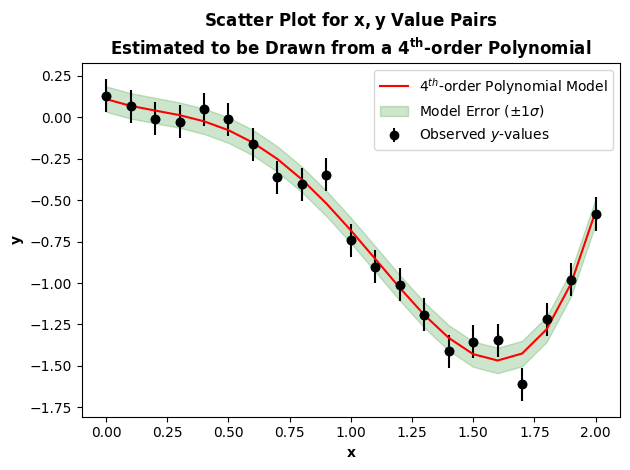

In [9]:
### polynomial plot ###

# plot poltdat.txt data in scatter plot
plt.scatter(x, y)

# add 0.1stdev errors to y-values
plt.errorbar(x, y, yerr = sigma, fmt = "o", color = "black", label = "Observed $y$-values")

# derive residuals and polynomial coefficients for 4th-order model
residuals = y - expected_y
best_fit_coefficients = np.poly1d(np.polyfit(x, y, deg = 4))

# plot 4th-order polynomial using derived coefficients
plt.plot(
    x,
    np.poly1d(np.polyfit(x, y, deg = 4))(x),
    color = "red",
    label = "$4^{th}$-order Polynomial Model"
)

# add 1-stdev error band around best-fit line
plt.fill_between(
    x, 
    best_fit_coefficients(x) - np.std(residuals), 
    best_fit_coefficients(x) + np.std(residuals), 
    color = "green", 
    alpha = 0.2, 
    label = r"Model Error ($\pm 1\sigma$)"
)

plt.title(r"Scatter Plot for $\mathbf{x, y}$ Value Pairs" + "\nEstimated to be Drawn from a " + r"$\mathbf{4^{th}}$" + "-order Polynomial", fontweight = "bold")
plt.xlabel("x", fontweight = "bold")
plt.ylabel("y", fontweight = "bold")

plt.legend()

plt.tight_layout()
plt.show()


### 3. MCMC astronomy example: fitting the galaxy stellar mass function

<strong>In the first part of this exercise, you will write a Monte Carlo program to generate a distribution of galaxy masses that follows a two-parameter distribution. In the second part, you will use Markov Chain Monte Carlo (MCMC) to recover the parameters of this distribution, and to explore the degeneracies between them.

The stellar masses M of galaxies in the nearby Universe are found to follow a distribution whose shape can be described by a Schechter function, given by:</strong>$$p(log_{10}M|M^{*}, \alpha) \propto e^{-M/M^{*}}\left(\frac{M}{M^{*}}\right)^{\alpha + 1}$$

<strong>where </strong>$\alpha$ <strong>is the power-law slope at low masses and</strong> $M^{*}$ <strong>gives the location of an exponential cutoff at high masses. Results from the Galaxy and Mass Assembly Survey yield the following parameters in appropriate units: </strong>$log_{10}M^{*} = 10.66, \alpha = −1.1$
<br>
<br>
<br>
<br>
<strong>(a) (i) Sample Generation. Write a program to generate the stellar masses of </strong>$1{,}000$<strong> galaxies in the mass range </strong>$8 < log_{10}M < 11.5$<strong> according to the distribution </strong>$(2)$<strong> with parameter values as given above. You will need to find an efficient way of generating the masses from the standard </strong>$U (0, 1)$<strong> random number generator supplied with most programming languages.</strong>

To generate a sample of stellar masses from $1{,}000$ from the $U[0,1]$ distribution, using the provided probability density function, we can apply the transformation method.

Firstly, we need to normalise the probability density function provided by integrating between our mass range $8 < log_{10}M < 11.5$:$$\int_{8}^{11.5}e^{-M/M^{*}}\left(\frac{M}{M^{*}}\right)^{\alpha + 1}~dlog_{10}M$$

To solve, we can use the <strong> scipy.integrate.quad(our_pdf, 8, 11.5) </strong> function. We can also note that $log_{10}M^{*} = 10.66 \implies 10^{10.66} = M^{*}$, which helps simplify somewhat.

Once we obtain the normalisation constant $C$ for the normalised pdf, we next need to find the cumulative distribution function for this normalised pdf by integrating between $8$ and $log_{10}M$ and setting this equal to our uniform variable $x$:$$x=\int_{8}^{log_{10}M} \frac{e^{-M^{'}/M^{*}}\left(\displaystyle\frac{M^{'}}{M^{*}}\right)^{\alpha + 1}}{C} ~dlog_{10}M^{'}$$

Solving for $M$ would provide an expression that can be used to generate $1{,}000$ stellar masses according to the Schechter function using values generated from $U[0,1]$. To achieve this numerically, we can create our distribution using <strong> scipy.stats.rv_continuous() </strong> without assuming a value for $M$. We can then generate our $1{,}000~M$-values by applying <strong> scipy.stats.rv_continuous.ppf(uniform_sample) </strong> to our created distribution, using $1{,}000$ generated values from $U[0,1]$.

In [10]:
# ensures reproducibility
np.random.seed(123)

uniform_samples = np.random.uniform(0, 1, 1000) # our 1,000 values from U[0,1] 
logM_star = 10.66                               # log_{10}M* = 10.66
alpha = -1.1                                    # alpha = -1.1

# our probability density function
def pdf(logM, logM_star, alpha):
    M_star = 10**logM_star # since log_10(x) = y --> x = 10^{y}
    M = 10**logM           # since log_10(x) = y --> x = 10^{y}    
    return (np.exp(-M / M_star)) * ((M / M_star)**(alpha + 1))

# integrate our pdf and store result as C
C = sp.integrate.quad(
    func = lambda logM: pdf(logM, logM_star, alpha),
    a = 8,
    b = 11.5
)[0] # [0], since we only need the value, not the error

# our normalised pdf
def normalised_pdf(logM, logM_star, alpha):
    return pdf(logM, logM_star, alpha) / C

# our cdf
def cdf(logM, logM_star, alpha):
    return sp.integrate.quad(
        func = lambda logM_prime: normalised_pdf(logM_prime, logM_star, alpha),
        a = 8,
        b = logM
    )[0]

# create our probability distribution using the scipy.stats.rv_continuous base class
class distribution(sp.stats.rv_continuous):
    
    # our normalised pdf
    def _pdf(self, logM):
        return normalised_pdf(logM, logM_star, alpha)
    
    # our (normalised) cdf
    def _cdf(self, logM):
        return cdf(logM, logM_star, alpha)
    
    # the lower bound for log_{10}M
    def _a(self):
        return 8
    
    # the upper bound for log_{10}M
    def _b(self):
        return 11.5

# apply ppf() to obtain inverse cdf from our distribution and then generate 1,000 M-values
generated_sample = distribution().ppf(uniform_samples)

# print array of generated M-values
print(generated_sample)



[ 9.54174601  8.56014902  8.43769971  9.16087281  9.60735739  8.85834599
 10.73914004  9.50920339  8.99161396  8.78884295  8.68157958  9.63524217
  8.8935193   8.11079768  8.80203764  9.66159662  8.34842127  8.33442841
  9.11249392  9.11316528  9.3726921  10.02540853  9.6218274   9.31159541
  9.61597786  8.63810908  8.72202136  8.44057313  8.57606373  9.36366091
  8.17224176  8.88240533  8.87594442  9.02167745  8.86451672  8.61530093
  8.86569822 10.1991077  10.45150584  9.04102817  9.34522878  8.21736399
  8.62599667  8.83964944 10.08902597  8.48600866  8.99655247 10.79911955
  9.08329454  9.31643898  8.22704172  9.94305672  9.29106703  9.14550537
  8.68068428  8.59803212  8.8445989   9.49941902 10.12497555  9.06152568
  9.46645779  9.24738638  9.34771665  9.48118698  9.99960014  8.15526936
  9.73914327  8.4720553   8.37184419  9.21342561  8.17913329 10.16512122
  9.35386454  9.61880482  8.029661    9.26897992  9.17438944  8.3018318
  8.29025359  9.53910302  8.62915483  9.52911737  9.

<strong>(ii) Plot a histogram of your generated masses. Use </strong>$50$<strong> equally spaced bins in log mass covering </strong>$8 < log_{10} M < 11.5$<strong> and use a logarithmic scale for the frequency axis.</strong>

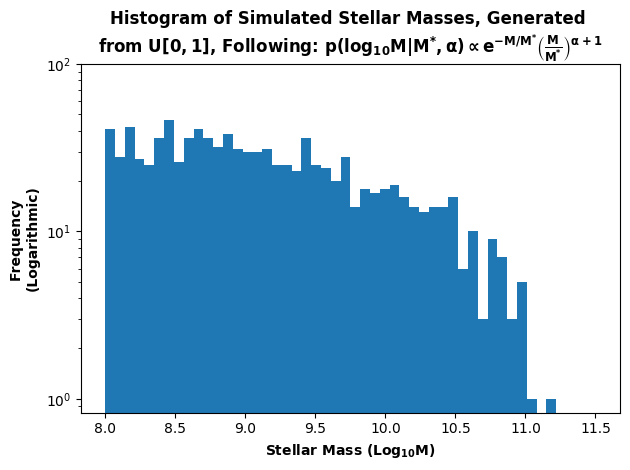

In [11]:
plt.hist(
    generated_sample,
    bins = 50,
    log = True,
    range = (8, 11.5)
)

plt.title(
    "Histogram of Simulated Stellar Masses, Generated \nfrom " r"$\mathbf{U[0,1]}$" ", Following: " + r"$\mathbf{p(log_{10}M|M^{*}, \alpha) \propto e^{-M/M^{*}}\left(\frac{M}{M^{*}}\right)^{\alpha + 1}}$",
    fontweight = "bold"
)
plt.xlabel("Stellar Mass $\\mathbf{(Log_{10}M)}$", fontweight = "bold")
plt.ylabel("Frequency \n(Logarithmic)", fontweight = "bold")
plt.ylim(top = 10**2)

plt.tight_layout()
plt.show()

<strong>(b) Parameter recovery. Now use MCMC methods to recover the parameters </strong>$log_{10}M^{*}$<strong> and </strong>$\alpha$<strong> and their </strong>$68\%$<strong> confidence intervals from your simulated data. Use maximum likelihood, rather than a least squares fit to your histogram, and use starting values around </strong>$log_{10}M^{*} = 11$<strong> and </strong>$\alpha = −1$<strong>. Show the histograms of parameter values covered by the chain, along with a scatter plot of </strong>$log_{10}M^{*}$<strong> against </strong>$\alpha$<strong> to illustrate their degeneracy. I strongly recommend that you use the example code supplied with emcee https://emcee.readthedocs.io/en/stable/ and modify that, rather than starting from scratch.</strong>

Firstly, to recover the parameters $log_{10}M^{*}$ and $\alpha$, we require the log-likelihood function. Starting with our normalised probability density function:$$p(log_{10}M|M^{*}, \alpha) = \frac{e^{-M/M^{*}}\left(\frac{M}{M^{*}}\right)^{\alpha + 1}}{C}$$ 

Finding the likelihood function:$$ \mathcal{L}(log_{10}M^{*}, \alpha) = \prod_{i=1}^{N} \left[\frac{e^{-M_{i}/M^{*}}\left(\frac{M_{i}}{M^{*}}\right)^{\alpha + 1}}{C}\right]$$ 
Taking the natural log:$$ \ln(\mathcal{L}(log_{10}M^{*}, \alpha)) = \sum_{i=1}^{N} \ln\left( \frac{e^{-M_{i}/M^{*}}\left(\frac{M_{i}}{M^{*}}\right)^{\alpha + 1}}{C}\right) $$ 
Distributing the logarithm:$$ \ln(\mathcal{L}(log_{10}M^{*}, \alpha)) = \sum_{i=1}^{N} \left[\ln\left(e^{-M_{i}/M^{*}}\right) + \ln\left(\left(\frac{M_{i}}{M^{*}}\right)^{\alpha + 1}\right) + \ln\left(\frac{1}{C}\right)\right] $$
$$ \boxed{\therefore~\mathcal{l}(log_{10}M^{*}, \alpha) = (\alpha + 1)\sum_{i=1}^{N}\ln\left(\frac{M_{i}}{M^{*}}\right) - \sum_{i=1}^{N} \frac{M_{i}}{M^{*}} - N\ln(C)} $$

We can use our log-likelihood function, in conjunction with a log-prior function to yield a log-posterior function:$$\ln(p(log_{10}M^{*}, \alpha | data)) \propto \ln(\mathcal{l}(log_{10}M^{*}, \alpha)) + \ln(p(data|log_{10}^{*}, \alpha)) $$

This log-posterior function can be used by the affine invariant ensemble sampler from Python's <strong> emcee </strong> library to yield a set of estimates for $log_{10}M^{*}$ and $\alpha$ via taking the mean average maximum likelihood estimates from multiple "walkers" exploring the 2-D parameter space.

For our log-prior function, I've decided to assume Gaussian priors around the "known" values $log_{10}M^{*} = 10.66$ and $\alpha = -1.1$, each with 1 standard deviation. 

In [12]:
np.random.seed(123) # ensures reproducibility

def log_likelihood(params, data):
    logM_star, alpha = params
    M_star = 10 ** logM_star
    lnlike = (((alpha + 1) * np.sum(generated_sample / M_star)) - (np.sum(generated_sample / M_star)) - (len(generated_sample) * np.log(C)))
    return lnlike

def log_prior(params):
    logM_star, alpha = params
    
    # assuming Gaussian priors on the estimates for logM* and alpha (with 1 stdev)
    
    logM_star_prior = -0.5 * ((logM_star - 10.66))**2
    alpha_prior = -0.5 * ((alpha + 1.1))**2
    
    return logM_star_prior + alpha_prior

def log_posterior(params, data):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, data) # sum since they are log-likelihood and priors

ndim, nwalkers, steps = 2, 50, 10000 # 2 parameters, 50 walkers, 10,000 steps

# initial starting points for the walkers
p0 = [np.array([11, -1]) + np.random.randn(ndim) * 1e-2 for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, 
    log_posterior, 
    args = [generated_sample]
)

sampler.run_mcmc(p0, steps, progress = True)

100%|██████████| 10000/10000 [00:13<00:00, 748.11it/s]


State([[ 9.96240856 -1.28675022]
 [10.88496489 -2.04726937]
 [ 9.88809275 -0.67734835]
 [10.78910092 -0.29343226]
 [11.1982118  -1.77367199]
 [11.13883047 -1.22602002]
 [11.11920653 -1.35715733]
 [10.74183835 -0.83065134]
 [12.46924213 -0.14187369]
 [10.01060513 -0.97068421]
 [10.72225547  0.81452939]
 [14.40374577 -0.36838187]
 [13.40353579 -0.85796828]
 [10.41831062 -0.26219341]
 [10.86355442 -2.37582403]
 [10.30427862  0.78156226]
 [10.27335832 -1.49339798]
 [10.45343874 -1.41317321]
 [13.6950336  -2.40620462]
 [ 9.4405423   0.17545748]
 [10.553697   -0.99430393]
 [10.15407716  0.171561  ]
 [ 9.69180755 -1.59698666]
 [11.68170218 -1.43717205]
 [10.66463981 -1.44698969]
 [ 9.819797   -2.85340899]
 [10.44829192 -1.66785995]
 [11.48056479  0.45993654]
 [10.31259151 -2.4355703 ]
 [11.04766959 -2.93026553]
 [11.61853338 -1.77150481]
 [10.76743278 -0.22628562]
 [10.8191356   0.7716312 ]
 [11.38977474 -2.61568076]
 [10.86239004 -2.33014758]
 [10.68738829 -2.85822245]
 [10.09165171 -0.50588

In [13]:
burn_in = int(0.1 * steps) # discard first 10% (burn-in phase)

samples = sampler.get_chain(
    discard = burn_in, 
    flat = True
)
print(f"""
Mean log10M*: {np.mean(samples[:,0])}
68% Confidence Intervals: {np.percentile(samples[:,0], (16, 84))}

Mean alpha: {np.mean(samples[:,1])}
68% Confidence Intervals: {np.percentile(samples[:,1], (16, 84))}
""")


Mean log10M*: 10.670078764446712
68% Confidence Intervals: [ 9.67675367 11.67029681]

Mean alpha: -1.1079301468838902
68% Confidence Intervals: [-2.10468201 -0.11196827]



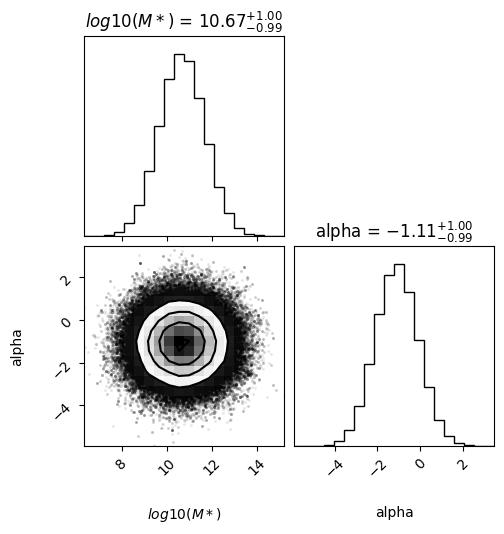

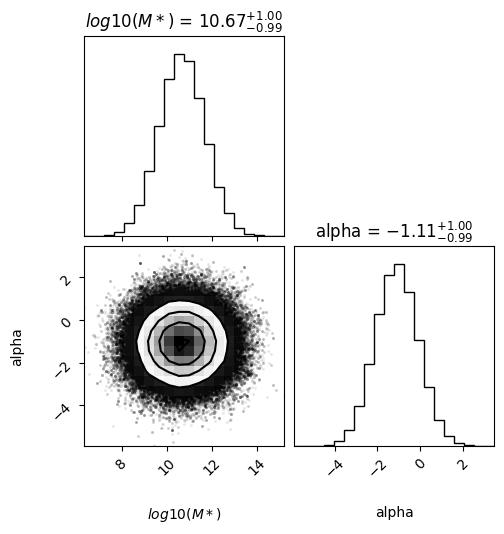

In [15]:
corner.corner(
    samples, 
    labels = ["$log{10}(M*)$", "alpha"], 
    show_titles = True
)